In [4]:
#load data

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
x = boston.data
y = boston.target
col = boston.feature_names
print(x.shape)
print(y.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
(506,)


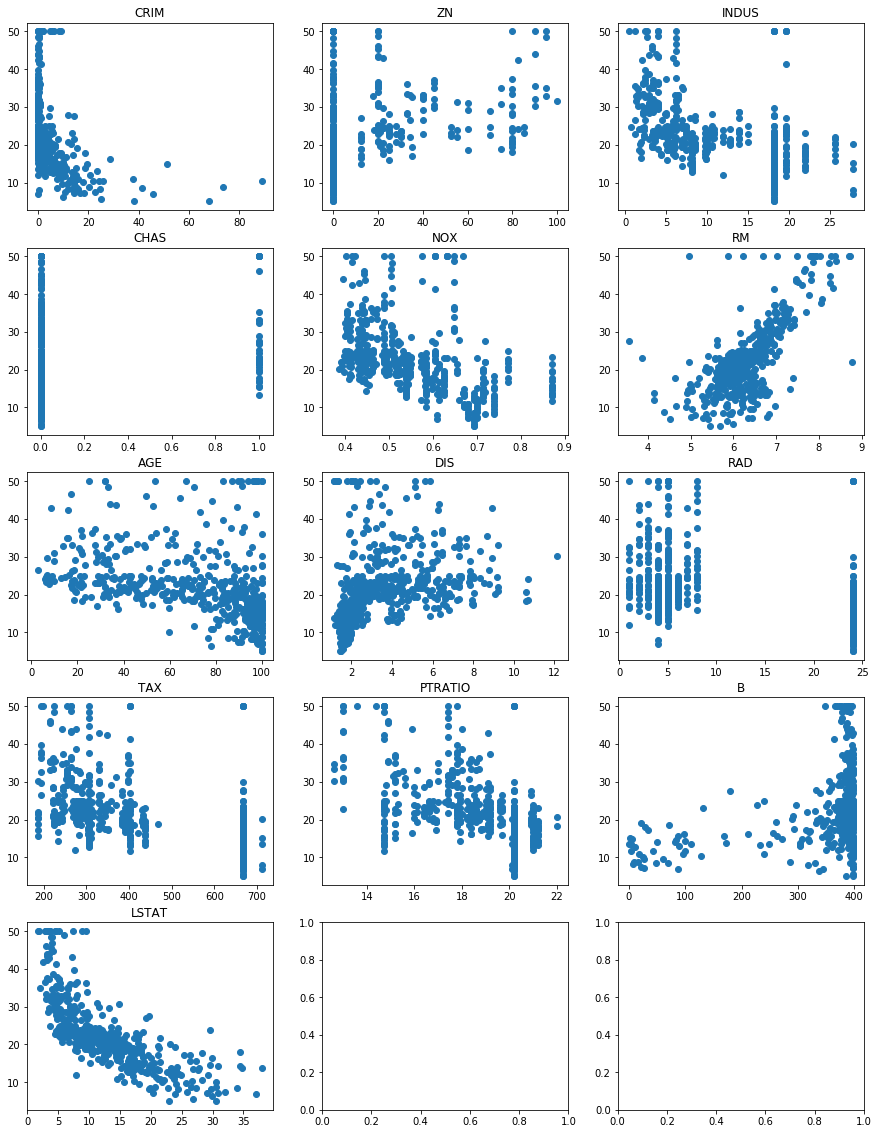

In [14]:
#Correlation of each independent variable and dependent variable

import matplotlib.pyplot as plt
fig,axes = plt.subplots(5,3,figsize=(15,20))
for i, ax in enumerate(axes.ravel()):
    if i<x.shape[1]:
        ax.scatter(x[:,i],y)
        ax.set_title(col[i])
plt.show()

In [15]:
#Split dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [28]:
#Simple Linear Regression('RM')

idx = list(col).index('RM')
x_train_rm = x_train[:,idx].reshape((-1,1))
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train_rm,y_train)
print(lr.fit)
print('coef_ : {} \nintercept_ : {} \nR2 score for train set is {}'.format(lr.coef_,lr.intercept_,lr.score(x_train_rm,y_train)))

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
coef_ : [9.42313991] 
intercept_ : -36.704385411513144 
R2 score for train set is 0.5085476841133245


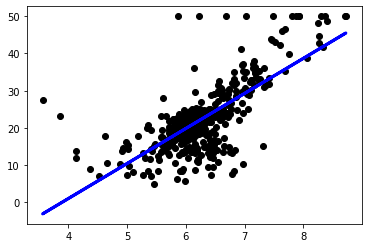

In [26]:
#Analysis accuracy : train set

y_predict = lr.predict(x_train_rm)
plt.scatter(x_train_rm,y_train,color='black')
plt.plot(x_train_rm,y_predict,color='blue',lw=3)
plt.show()


In [29]:
#Test set 

x_test_rm = x_test[:,idx].reshape((-1,1))
print('R2 score for test set is ',lr.score(x_test_rm,y_test))

R2 score for test set is  0.3786382953720009


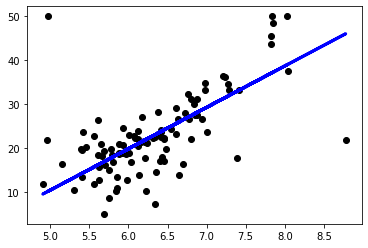

In [30]:
#Analysis accuracy : test set

y_predict = lr.predict(x_test_rm)
plt.scatter(x_test_rm,y_test,color='black')
plt.plot(x_test_rm,y_predict,color='blue',lw=3)
plt.show()

In [32]:
#Multiple Linear Regression

lr.fit(x_train,y_train)
print(lr.fit)
print('coef_ : {} \nintercept : {} \n R2 score for train test is {} : '.format(lr.coef_,lr.intercept_,lr.score(x_train,y_train)))

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
coef_ : [-9.49176807e-02  3.81731499e-02  1.69669050e-02  3.72161177e+00
 -1.70956521e+01  4.25690956e+00  3.79108955e-03 -1.40810038e+00
  2.87120418e-01 -1.08108813e-02 -9.50950777e-01  1.05753719e-02
 -5.15908850e-01] 
intercept : 31.824724260250512 
 R2 score for train test is 0.7596960303589534 : 


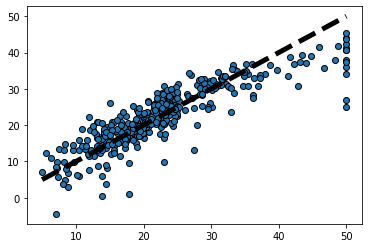

In [41]:
#Analysis accuracy

predicted = lr.predict(x_train)
plt.scatter(y_train,predicted,edgecolors=(0,0,0))
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=5)
plt.show()

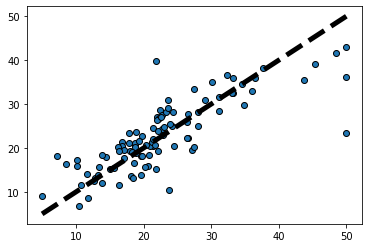

R2 score for test set is 0.6517870351223516


In [42]:
#Test set
predicted = lr.predict(x_test)
plt.scatter(y_test,predicted,edgecolors=(0,0,0))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=5)
plt.show()
print('R2 score for test set is',lr.score(x_test,y_test))

In [59]:
#Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
print(scaler)
print('mean_ : {}\nvarience : {}'.format(scaler.mean_,scaler.var_))
scaled_x_train = scaler.transform(x_train)
scaled_x_test  = scaler.transform(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)
mean_ : [3.52118146e+00 1.07264851e+01 1.13254208e+01 7.17821782e-02
 5.54882673e-01 6.27890594e+00 6.91294554e+01 3.79778812e+00
 9.60891089e+00 4.09306931e+02 1.84831683e+01 3.57000520e+02
 1.27667574e+01]
varience : [6.89630387e+01 5.09060709e+02 4.72073654e+01 6.66294971e-02
 1.27672319e-02 4.85428570e-01 7.75137622e+02 4.25079296e+00
 7.56193265e+01 2.87863563e+04 4.49838006e+00 8.27281357e+03
 5.24291838e+01]


In [61]:
lr.fit(scaled_x_train,y_train)
print('R2 score for scaled train set is {:.3f}'.format(lr.score(scaled_x_train,y_train)))
print('R2 score for scaled test set is {:.3f}'.format(lr.score(scaled_x_test,y_test)))

R2 score for scaled train set is 0.760
R2 score for scaled test set is 0.652
